In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pytz import timezone
from datetime import datetime, timedelta
from skyfield import almanac, earthlib
from skyfield.api import Loader, Topos
import satpred

In [2]:
load = Loader('./data')

In [40]:
plt.rcParams['figure.figsize'] = [15, 15]

In [3]:
ts = load.timescale()
ephemeris = load('de421.bsp')
satellites = load.tle('http://celestrak.com/NORAD/elements/stations.txt', reload=True)

[#################################] 100% stations.txt


In [4]:
sun = ephemeris['sun']
earth = ephemeris['earth']
iss = satellites['ISS']
manhattan_beach_ca_usa = Topos(latitude='33.881519 N', longitude='118.388177 W', elevation_m=33)
pacific = timezone('US/Pacific')

In [5]:
d0 = datetime(2019, 6, 1, 0, 0)
t0 = ts.utc(pacific.localize(d0))
d1 = datetime(2019, 6, 11, 0, 0)
t1 = ts.utc(pacific.localize(d1))

In [6]:
df = pd.DataFrame(satpred.passes(t0, t1, manhattan_beach_ca_usa, iss, earth, sun, pretty=True))

In [7]:
columns = ['date', 'peak_magnitude', 'start', 'start_alt', 'start_az', 'start_d', 'culm', 'culm_alt', 
         'culm_az', 'culm_d', 'end', 'end_alt', 'end_az', 'end_d']

In [8]:
df[columns]

,date,peak_magnitude,start,start_alt,start_az,start_d,culm,culm_alt,culm_az,culm_d,end,end_alt,end_az,end_d
0,2019-06-01,0.2,22:51:29,10,NW,1497,22:52:57,23,NW,923,22:52:57,23,NW,921
1,2019-06-02,-2.1,22:02:13,10,NNW,1496,22:05:17,34,NE,706,22:05:17,34,NE,706
2,2019-06-03,-1.7,21:13:08,10,NNW,1495,21:15:44,20,NNE,1014,21:17:39,13,ENE,1298
3,2019-06-03,0.0,22:49:23,10,WNW,1495,22:50:29,18,WNW,1103,22:50:29,18,WNW,1101
4,2019-06-04,-3.4,21:59:44,10,NW,1494,22:02:55,71,WSW,441,22:02:55,71,WSW,441
5,2019-06-05,-3.4,21:10:19,10,NW,1493,21:13:37,54,NE,511,21:15:24,24,ESE,914
6,2019-06-06,-1.6,21:57:59,10,WNW,1492,22:00:37,21,SW,984,22:00:46,21,SW,986
7,2019-06-07,-2.8,21:08:04,10,WNW,1492,21:11:15,42,SW,600,21:13:23,18,SSE,1087
8,2019-06-09,-0.9,21:06:59,10,W,1489,21:08:41,13,SW,1298,21:10:24,10,SSW,1487


In [9]:
df = pd.DataFrame(satpred.passes(t0, t1, manhattan_beach_ca_usa, iss, earth, sun, visible=False, pretty=True))

In [10]:
columns = ['date', 'start', 'start_alt', 'start_az', 'start_d', 'culm', 'culm_alt', 
         'culm_az', 'culm_d', 'end', 'end_alt', 'end_az', 'end_d', 'pass_type']

In [11]:
df[columns]

,date,start,start_alt,start_az,start_d,culm,culm_alt,culm_az,culm_d,end,end_alt,end_az,end_d,pass_type
0,2019-06-01,14:43:53,10,S,1468,14:46:44,27,SE,823,14:49:36,10,ENE,1479,daylight
1,2019-06-01,16:20:37,10,W,1476,16:23:22,23,NW,909,16:26:08,10,NNE,1485,daylight
2,2019-06-01,22:51:29,10,NW,1497,22:54:49,66,NE,455,22:58:10,10,SE,1494,visible
3,2019-06-02,13:55:39,10,SSE,1468,13:57:26,14,SE,1255,13:59:15,10,E,1475,daylight
4,2019-06-02,15:30:40,10,WSW,1472,15:33:49,41,NW,604,15:36:59,10,NNE,1483,daylight
5,2019-06-02,22:02:13,10,NNW,1496,22:05:19,34,NE,706,22:08:25,10,ESE,1494,visible
6,2019-06-02,23:39:27,10,W,1495,23:41:47,18,SW,1110,23:44:07,10,S,1491,eclipsed
7,2019-06-03,14:41:02,10,SW,1469,14:44:20,84,NW,413,14:47:40,10,NE,1481,daylight
8,2019-06-03,16:20:21,10,NW,1481,16:21:27,11,NNW,1408,16:22:33,10,N,1484,daylight
9,2019-06-03,21:13:08,10,NNW,1495,21:15:44,20,NNE,1014,21:18:20,10,E,1495,visible


In [12]:
df[df['pass_type'] == 'visible'][columns]

,date,start,start_alt,start_az,start_d,culm,culm_alt,culm_az,culm_d,end,end_alt,end_az,end_d,pass_type
2,2019-06-01,22:51:29,10,NW,1497,22:54:49,66,NE,455,22:58:10,10,SE,1494,visible
5,2019-06-02,22:02:13,10,NNW,1496,22:05:19,34,NE,706,22:08:25,10,ESE,1494,visible
9,2019-06-03,21:13:08,10,NNW,1495,21:15:44,20,NNE,1014,21:18:20,10,E,1495,visible
10,2019-06-03,22:49:23,10,WNW,1495,22:52:28,34,SW,701,22:55:33,10,SSE,1491,visible
14,2019-06-04,21:59:44,10,NW,1494,22:03:04,73,SW,435,22:06:25,10,SE,1491,visible
17,2019-06-05,21:10:19,10,NW,1493,21:13:37,54,NE,511,21:16:54,10,ESE,1491,visible
22,2019-06-06,21:57:59,10,WNW,1492,22:00:37,21,SW,984,22:03:14,10,S,1489,visible
26,2019-06-07,21:08:04,10,WNW,1492,21:11:15,42,SW,600,21:14:27,10,SSE,1488,visible
34,2019-06-09,21:06:59,10,W,1489,21:08:41,13,SW,1298,21:10:24,10,SSW,1487,visible


In [13]:
above_alt_40 = df['culm_alt'] > 40. 
visible = df['pass_type'] == 'visible'
df[visible & above_alt_40][columns]

,date,start,start_alt,start_az,start_d,culm,culm_alt,culm_az,culm_d,end,end_alt,end_az,end_d,pass_type
2,2019-06-01,22:51:29,10,NW,1497,22:54:49,66,NE,455,22:58:10,10,SE,1494,visible
14,2019-06-04,21:59:44,10,NW,1494,22:03:04,73,SW,435,22:06:25,10,SE,1491,visible
17,2019-06-05,21:10:19,10,NW,1493,21:13:37,54,NE,511,21:16:54,10,ESE,1491,visible
26,2019-06-07,21:08:04,10,WNW,1492,21:11:15,42,SW,600,21:14:27,10,SSE,1488,visible


In [82]:
passes = satpred.passes(t0, t1, manhattan_beach_ca_usa, iss, earth, sun, visible=False, pretty=False)

In [108]:
iss_pass = passes[17]
jd0, jd1 = iss_pass['start_time'].tt, iss_pass['end_time'].tt
jd = np.linspace(jd0, jd1, 32)
t = ts.tt(jd=jd)

In [150]:
difference = iss - manhattan_beach_ca_usa
topocentric = difference.at(t)
sat_alt, sat_az, _ = topocentric.altaz()
end_topocentric = difference.at(iss_pass['end_time'])
end_alt, end_az, _ = end_topocentric.altaz()

In [121]:
from skyfield.api import Star
from skyfield.data import hipparcos

with load.open(hipparcos.URL) as f:
    df = hipparcos.load_dataframe(f)
    
bright = df[df['magnitude'] <= 5.]

In [122]:
def magnitude_to_marker_size(mag):
    if mag < -1.:
        return 120
    elif mag < 0.:
        return 100
    elif mag < 0.5:
        return 80
    elif mag < 1.:
        return 65
    elif mag < 3.:
        return 40
    elif mag < 4.:
        return 10
    elif mag < 5.:
        return 5
    else:
        return 4

In [123]:
observer = earth + manhattan_beach_ca_usa
theta, r, mag = [], [], []
for i in range(len(bright)):
    star = Star.from_dataframe(bright.iloc[i])
    app = observer.at(iss_pass['start_time']).observe(star).apparent()
    alt, az, _ = app.altaz()
    theta.append(az.radians)
    r.append(alt.degrees)
    mag.append(bright.iloc[i]['magnitude'])
sun_apparent = observer.at(iss_pass['start_time']).observe(ephemeris['sun']).apparent()
sun_alt, sun_az, _ = sun_apparent.altaz()
moon_apparent = observer.at(iss_pass['start_time']).observe(ephemeris['moon']).apparent()
moon_alt, moon_az, _ = moon_apparent.altaz()
mercury_apparent = observer.at(iss_pass['start_time']).observe(ephemeris['mercury']).apparent()
mercury_alt, mercury_az, _ = mercury_apparent.altaz()
venus_apparent = observer.at(iss_pass['start_time']).observe(ephemeris['venus']).apparent()
venus_alt, venus_az, _ = venus_apparent.altaz()
mars_apparent = observer.at(iss_pass['start_time']).observe(ephemeris['mars']).apparent()
mars_alt, mars_az, _ = mars_apparent.altaz()
jupiter_apparent = observer.at(iss_pass['start_time']).observe(ephemeris['JUPITER BARYCENTER']).apparent()
jupiter_alt, jupiter_az, _ = jupiter_apparent.altaz()
saturn_apparent = observer.at(iss_pass['start_time']).observe(ephemeris['SATURN BARYCENTER']).apparent()
saturn_alt, saturn_az, _ = saturn_apparent.altaz()

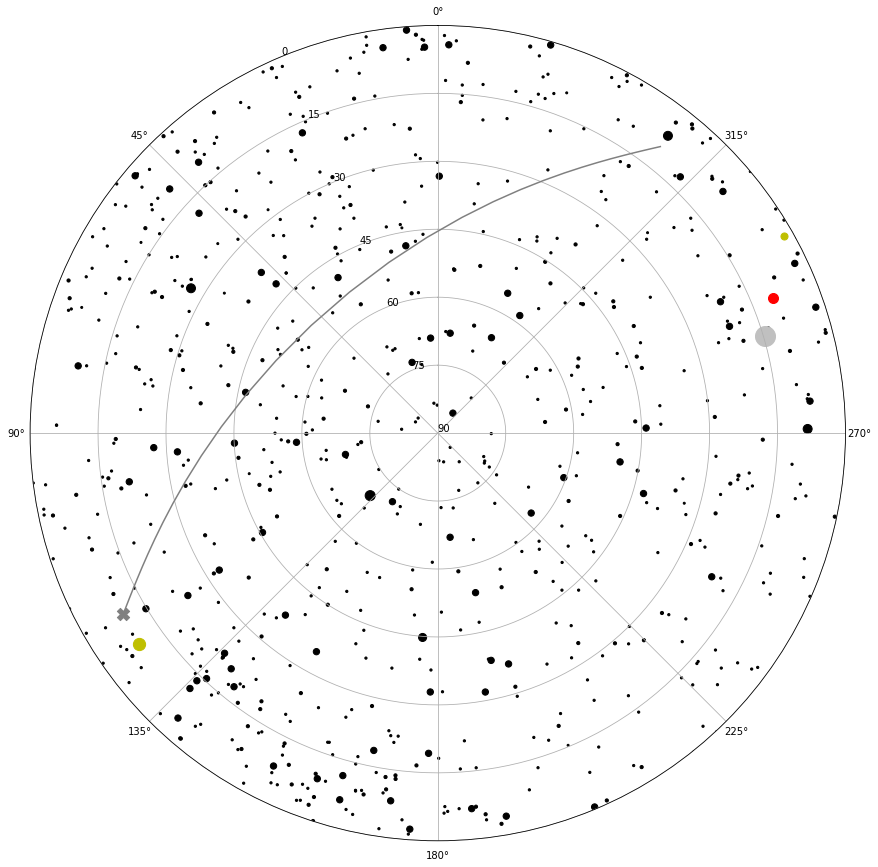

In [166]:
ax = plt.subplot(111, projection='polar')
ax.set_rlim(0, 90)
ax.set_theta_zero_location('N')
ax.set_theta_direction(1)
ax.set_yticks(np.arange(0, 105, 15))
ax.set_yticklabels(ax.get_yticks()[::-1])
plt.scatter(np.array(theta), 90.-np.array(r), [ magnitude_to_marker_size(v) for v in mag ], 'k')
plt.scatter(sun_az.radians, 90.-sun_alt.degrees, 400, 'y')
plt.scatter(moon_az.radians, 90.-moon_alt.degrees, 400, 'silver')
plt.scatter(mercury_az.radians, 90.-mercury_alt.degrees, 50, 'y')
plt.scatter(venus_az.radians, 90.-venus_alt.degrees, 150, 'c')
plt.scatter(mars_az.radians, 90.-mars_alt.degrees, 100, 'r')
plt.scatter(jupiter_az.radians, 90.-jupiter_alt.degrees, 150, 'y')
plt.scatter(saturn_az.radians, 90.-saturn_alt.degrees, 125, 'y')
plt.scatter(end_az.radians, 90.-end_alt.degrees, 150, 'grey', 'X')
plt.plot(sat_az.radians, 90.-sat_alt.degrees, 'grey')
plt.show()